### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful tool for reducing the dimensionality of data while retaining most of the original variance. Here's a detailed yet easy-to-understand explanation of PCA, including the mathematics behind it and a real-world example with Python code.

### Principal Component Analysis (PCA)

#### Concept

PCA is a statistical technique used to emphasize variation and bring out strong patterns in a dataset. It does this by transforming the data into a new coordinate system where the greatest variances by any projection of the data come to lie on the first coordinates (called principal components), the second greatest variances on the second coordinates, and so on.

#### Mathematics Behind PCA

1. **Standardization**:
   - Subtract the mean of each feature from the dataset and divide by the standard deviation to ensure each feature has a mean of 0 and a standard deviation of 1.

2. **Covariance Matrix**:
   - Compute the covariance matrix to understand how the variables of the input data are varying from the mean with respect to each other.

3. **Eigenvalues and Eigenvectors**:
   - Calculate the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude.

4. **Principal Components**:
   - Sort the eigenvalues and their corresponding eigenvectors. The top \(k\) eigenvectors form the \(k\)-dimensional feature space that we can project the data onto.

5. **Transformation**:
   - Transform the original dataset to the new feature space using the selected eigenvectors.

### Real-World Example: PCA on the Iris Dataset

#### Step-by-Step Guide

##### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### Step 2: Load the Iris Dataset

In [2]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Display the first few rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Step 3: Standardize the Data

In [3]:
# Standardize the features
features = data.iloc[:, :-1]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [4]:
# Display the first few rows of the scaled data
pd.DataFrame(data_scaled, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


##### Step 4: Perform PCA

In [5]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_data = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_data['species'] = data['species']

In [6]:
# Display the first few rows of the PCA-transformed data
pca_data.head()

,Principal Component 1,Principal Component 2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


##### Step 5: Visualize the PCA Result

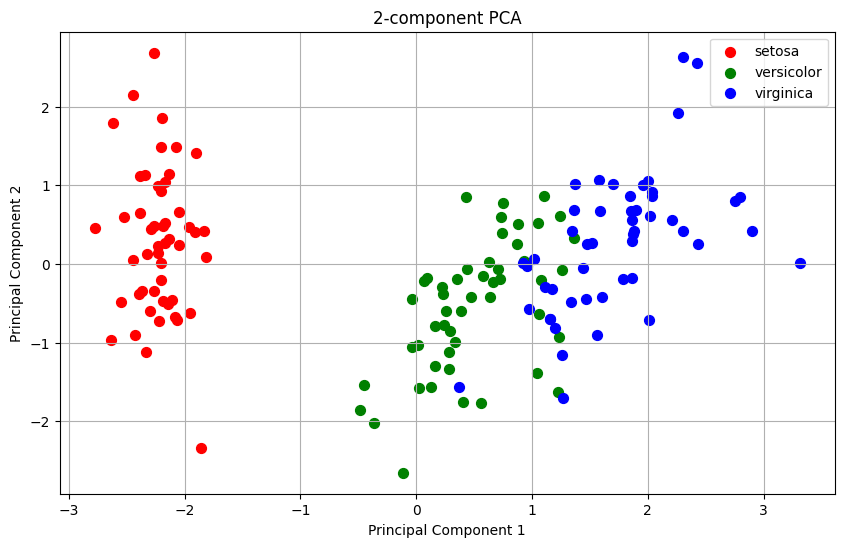

In [7]:
# Visualize the PCA result
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
species = [0, 1, 2]
for color, spec in zip(colors, species):
    indices_to_keep = pca_data['species'] == spec
    plt.scatter(pca_data.loc[indices_to_keep, 'Principal Component 1'],
                pca_data.loc[indices_to_keep, 'Principal Component 2'],
                c=color,
                s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-component PCA')
plt.legend(iris.target_names)
plt.grid()
plt.show()

##### Step 6: Explained Variance

In [8]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by principal components: {explained_variance}')

Explained variance by principal components: [0.72962445 0.22850762]
